In [1]:
import pandas as pd
import time
from time import perf_counter

In [2]:
X_train = pd.read_csv('data/X_train.csv', index_col=0) 
X_test = pd.read_csv('data/X_test.csv', index_col=0) 
X_val = pd.read_csv('data/X_val.csv', index_col=0) 
y_train = pd.read_csv('data/y_train.csv', index_col=0) 
y_test = pd.read_csv('data/y_test.csv', index_col=0)
y_val = pd.read_csv('data/y_val.csv', index_col=0)

In [3]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

In [4]:
X_train.head(3)

,year,cylinders,odometer,description,lat,long,posting_weekday,posting_month,posting_year,condition_excellent,...,car_model_volkswagen passat,car_model_volkswagen tiguan,car_model_volvo s60,car_model_volvo xc60,car_model_volvo xc70,car_model_volvo xc90,state_midwest,state_northeast,state_south,state_west
322098,2017.0,8,74863.0,LANDERS MOTORS:Landers Motors(503) 381-6150415...,45.519861,-122.434111,3,11,2020,0,...,0,0,0,0,0,0,0,0,0,1
344532,2019.0,4,4142.0,Carvana is the safer way to buy a car During t...,41.400000,-75.660000,1,11,2020,0,...,0,0,0,0,0,0,0,1,0,0
13565,2013.0,4,61674.0,Carvana is the safer way to buy a car During t...,34.620000,-112.420000,3,11,2020,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
X_train.drop(['description'], axis = 1, inplace = True)
X_val.drop(['description'], axis = 1, inplace = True)
X_test.drop(['description'], axis = 1, inplace = True)

In [6]:
index = X_train.columns
model_score = pd.DataFrame(columns=('r2', 'mae','rmse', 'mse', 'run_time' ))

In [7]:
#analyzing shape to find if there any discrepancy before starting to model
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}') 
print(f'y_test Shape: {y_test.shape}') 
print(f'X_val Shape: {X_val.shape}') 
print(f'y_val Shape: {y_val.shape}')

X_train Shape: (204156, 350)
y_train Shape: (204156,)
X_test Shape: (63799, 350)
y_test Shape: (63799,)
X_val Shape: (51039, 350)
y_val Shape: (51039,)


In [8]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import math 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [9]:
from sklearn.preprocessing import StandardScaler
# Scaling data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [10]:
t0 = perf_counter()
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_predict = lr_model.predict(X_val)


lr_r2 = lr_model.score(X_val,y_val)
lr_mse = mean_squared_error(y_val, lr_predict)
lr_mae = mean_absolute_error(y_val, lr_predict)
lr_rmse = sqrt(mean_squared_error(y_val, lr_predict))
t1 = perf_counter()
time_taken = t1 - t0
model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'mae':[lr_mae],'rmse':[lr_rmse], 'mse': [lr_mse],
                                               'run_time':[(time_taken)/60]} ,index = ['Linear Regression']))


# Evaluate
print(f"Linear Regression R2 score for train set: {lr_model.score(X_train, y_train)}")
print(f"Linear Regression R2 score for val set:  {lr_model.score(X_val,y_val)}")
print(f"Linear Regression MAE for val set: {lr_mae}")
print(f"Linear Regression RMSE for val set: {lr_rmse}" )
print(f"Linear Regression MSE for val set: {lr_mse}")
print(f"Linear Regression runtime: {time_taken/60}")

Linear Regression R2 score for train set: 0.7966507338896778
Linear Regression R2 score for val set:  0.7968935934751198
Linear Regression MAE for val set: 3803.299559983011
Linear Regression RMSE for val set: 5726.520396391912
Linear Regression MSE for val set: 32793035.850292582
Linear Regression runtime: 0.07852507333333326


In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

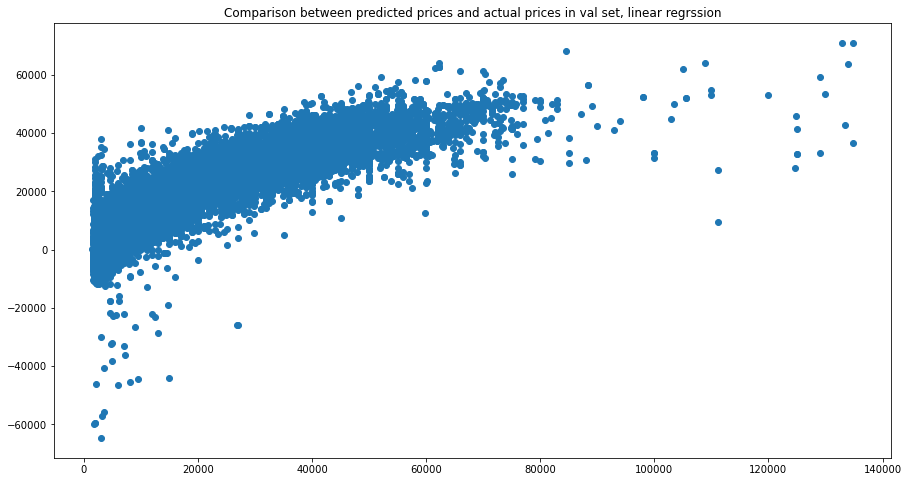

In [52]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Comparison between predicted prices and actual prices in val set, linear regrssion')
plt.scatter(y_val, lr_predict)

We can see that linear regression model does not perform well in the dataset. To show whether it is overfitting, we calculate the score for the training set:

In [13]:
lr_model.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

In [14]:
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

Parameters
fit_interceptbool, default=True
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

normalizebool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

copy_Xbool, default=True
If True, X will be copied; else, it may be overwritten.

n_jobsint, default=None
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

positivebool, default=False
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [25]:
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
cachedir=mkdtemp()

my_pipeline = Pipeline(steps=[('model', LinearRegression())], memory=cachedir )

In [26]:
estimator=my_pipeline
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'model', 'model__copy_X', 'model__fit_intercept', 'model__n_jobs', 'model__normalize'])

In [33]:
lr_params = {"model__fit_intercept": [True, False],
             }

In [38]:
#clf3 = GridSearchCV(reg, parameters, n_jobs=-1, n_iter=100)
rs=RandomizedSearchCV(estimator, lr_params, cv=5, n_jobs=-1, verbose=20, n_iter=100)

In [39]:
fitted_rs=rs.fit(X_train,y_train)

C:\Users\zesha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 2 is smaller than n_iter=100. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   22.2s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   22.6s remaining:   52.9s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   24.5s remaining:   36.8s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   24.6s remaining:   24.6s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   27.6s remaining:   18.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   33.5s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   34.0s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.2s finished


In [41]:
fitted_rs.best_estimator_

Pipeline(memory='C:\\Users\\zesha\\AppData\\Local\\Temp\\tmps8_hx5t7',
         steps=[('model', LinearRegression())])

In [42]:
print(f"R2 on train set: {fitted_rs.score(X_train, y_train)}")
print(f"R2 on test set: {fitted_rs.score(X_val, y_val)}")

R2 on train set: 0.7966507338896778
R2 on test set: 0.7968935934751198


In [43]:
lr_params = {"model__fit_intercept": [True, False],
             "model__copy_X":[True, False]
             }

In [45]:
gs=GridSearchCV(estimator, lr_params, cv=5, n_jobs=-1, verbose=20)

In [53]:
fitted_gs=gs.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:  3.5min remaining:  6.6min
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:  3.8min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:  4.0min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  13 out of  20 | elapsed:  4.2min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  4.4min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:  4.6min remaining:   48.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.6min finished


In [54]:
fitted_gs.best_estimator_

Pipeline(memory='C:\\Users\\zesha\\AppData\\Local\\Temp\\tmps8_hx5t7',
         steps=[('model', LinearRegression())])

In [55]:
print(f"R2 on train set: {fitted_gs.score(X_train, y_train)}")
print(f"R2 on test set: {fitted_gs.score(X_val, y_val)}")

R2 on train set: 0.7966507338896778
R2 on test set: 0.7968935934751198


In [49]:
model_score

,r2,mae,rmse,mse,run_time
Linear Regression,0.796894,3803.29956,5726.520396,3.279304e+07,0.078525


In [50]:
model_score.to_csv('data/model_scores.csv')

In [57]:

print(f"R2 on test set: {fitted_gs.score(X_test, y_test)}")

R2 on test set: 0.7940986716594325


This is the first model and R2 and MAE values are the highest in this model which is the reason we would not choose Linear Regression to move forward with